# Import Libarary

In [2]:
# Matplotlib for visualization                                                                                                                                                                                                  import numpy as np
import matplotlib.pyplot as plt

import numpy as np
# pandas for deailng with data
import pandas as pd

# Sklearn libarar
# Split data
from sklearn.model_selection import train_test_split
# Knn Model
from sklearn.neighbors import KNeighborsRegressor
# Exhustive search
from sklearn.model_selection import GridSearchCV
# Shulffle Data
from sklearn.utils import shuffle
# KFold and cross validation
from sklearn.model_selection import cross_val_score, KFold
# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler


### Read Data

In [3]:
# Read dataset
dataset = pd.read_csv('Dataset/NFLX.csv')
viz = dataset.copy()
# Drop 2 column Date, Adj Close
dataset=dataset.drop(["Date", "Adj Close"],axis=1)

### Create Features and Target

In [4]:
# set x (Feature)
x = dataset.drop("Close",axis=1).values.reshape(dataset.shape[0],dataset.shape[1]-1)
# Set y (Target)
y = dataset["Close"].values.reshape(dataset.shape[0],1)
# randomize dataset
x, y = shuffle(x, y, random_state=42)


### Data Preprocessing

In [22]:
# Data Preprocessing (Normalization)
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# y =scaler.fit_transform(y)
# print(y)
print(y)

[[0.60234598]
 [0.56977787]
 [0.58316765]
 ...
 [0.65983709]
 [0.10480326]
 [0.35888248]]


In [6]:
# Split dataset into train and test data
train, test = train_test_split(dataset, test_size = 0.2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [7]:
# Using KFold for split data into 5 sample
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"n_neighbors": range(1, 20)}


### Create Model

In [8]:
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=kf)
knn_cv.fit(x_train,y_train)
print("The bets parameter is", knn_cv.best_params_)

The bets parameter is {'n_neighbors': 9}


In [9]:
y_pred_train_knn=knn_cv.predict(x_train)
y_pred_test_knn=knn_cv.predict(x_test)

print("Train Score:", round(knn_cv.score(x_train,y_train)*100,2))
print("Test Score :", round(knn_cv.score(x_test,y_test)*100, 2))

Train Score: 99.67
Test Score : 99.65


In [10]:
# Compute 6-fold cross-validation scores
cv_scores_knn = cross_val_score(knn_cv, x, y)
# Print scores
print("knn's score:",cv_scores_knn)

knn's score: [0.9966189  0.99526833 0.99609932 0.9958496  0.99622485]


### Model Evalution

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
# Get accuracy of model
print("MSE",round(mean_squared_error(y_test,y_pred_test_knn), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_test_knn)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_test_knn), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_test_knn), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_test_knn), 3) * 100)

MSE 43.871
RMSE 6.624
MAE 4.801
MAPE 0.012
R2 Score :  99.6


### Model Visualization

In [12]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [13]:
viz['Date'] = pd.to_datetime(viz['Date'], format='%m/%d/%Y')

In [14]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


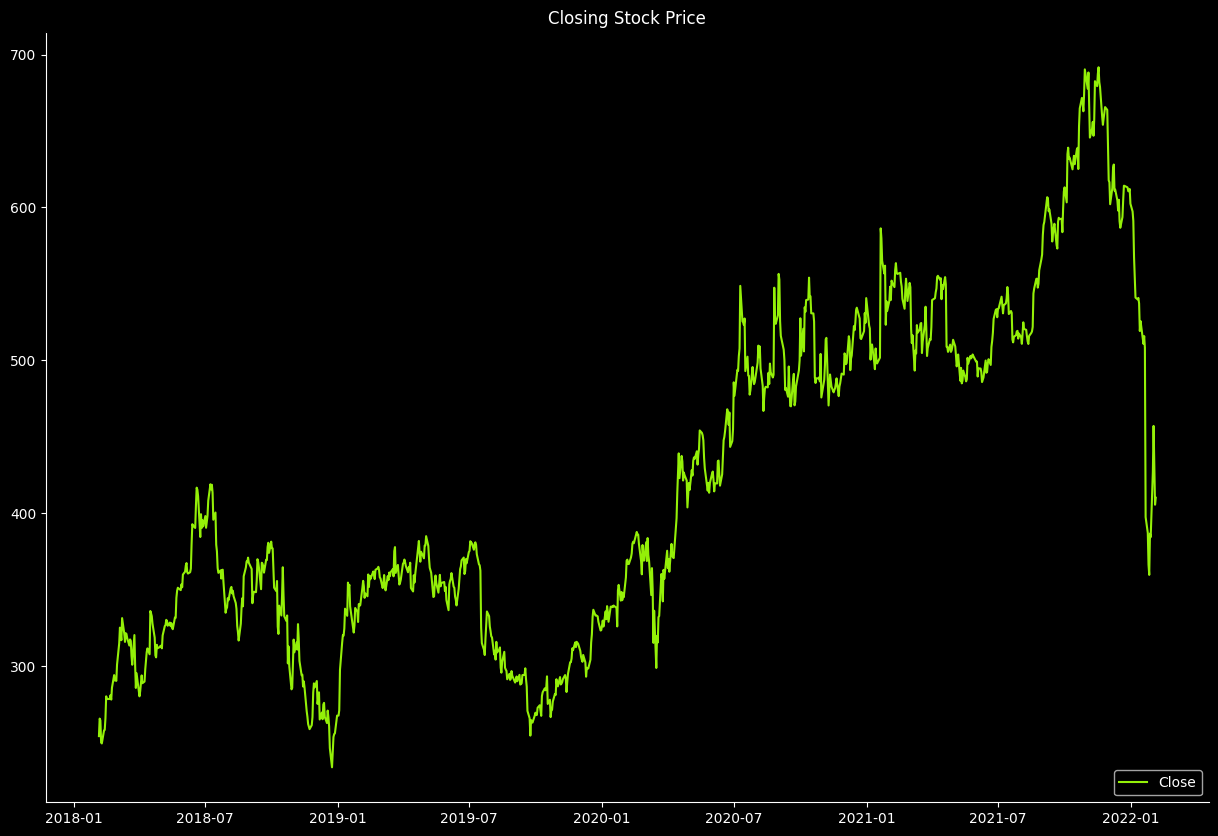

In [15]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

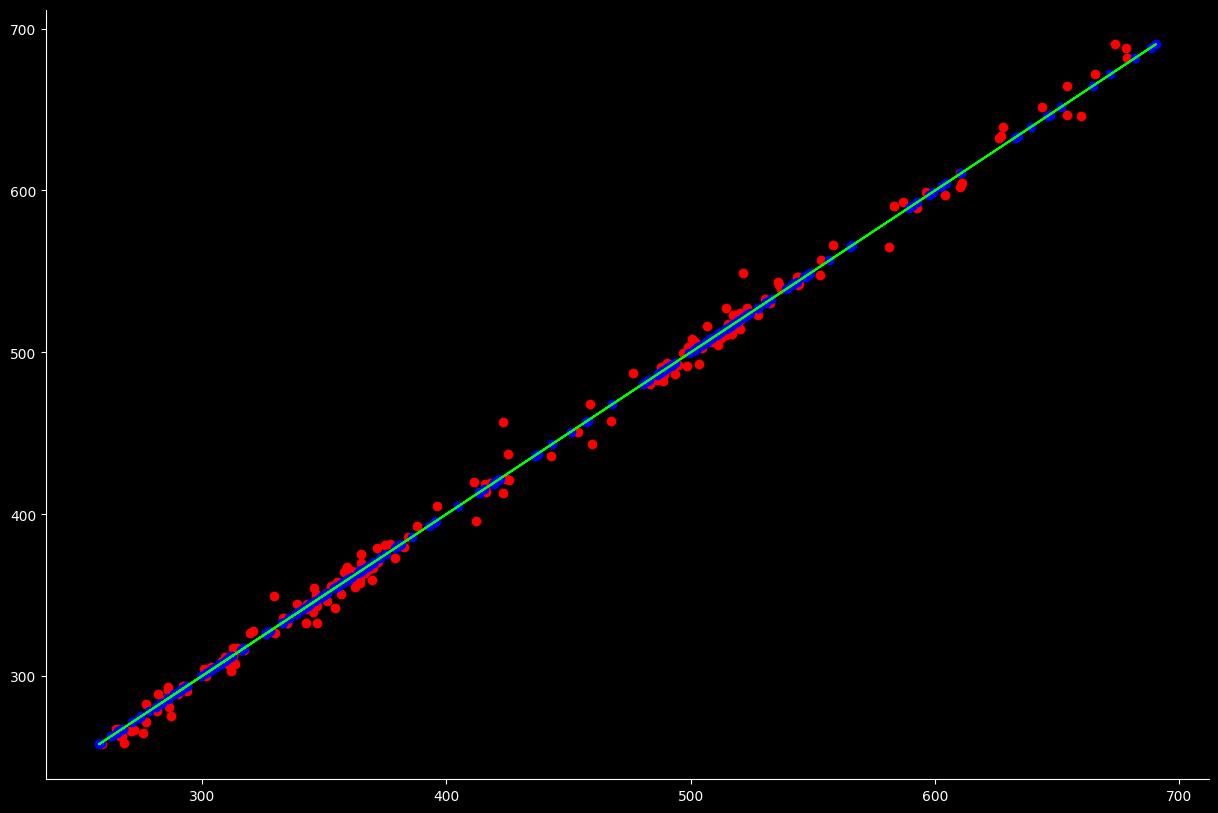

In [16]:
style()

plt.scatter(y_pred_test_knn, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [17]:
test_pred = test.copy()

In [18]:
test_pred['Close_Prediction'] = y_pred_test_knn
test_pred

,Open,High,Low,Close,Volume,Close_Prediction
807,508.000000,515.460022,503.600006,508.899994,22897400,352.830000
552,437.000000,449.519989,431.609985,439.170013,16128700,313.478885
182,332.279999,333.000000,300.730011,301.829987,19039300,516.836663
780,512.500000,526.510010,506.589996,518.020020,3981700,293.892222
674,533.479980,535.000000,524.150024,531.789978,5386500,490.333333
...,...,...,...,...,...,...
39,285.450012,291.250000,278.010010,283.670013,12694900,271.145554
207,282.320007,290.489990,275.500000,288.750000,15431500,521.414446
843,490.000000,491.410004,487.779999,488.769989,3124000,347.628886
648,532.599976,557.390015,532.450012,556.549988,9572700,388.044447


In [19]:
test_pred[['Close', 'Close_Prediction']].describe().T


,count,mean,std,min,25%,50%,75%,max
Close,202.0,407.365198,107.252853,257.950012,326.039993,366.935012,502.612495,682.609985
Close_Prediction,202.0,421.591066,110.924553,259.293332,333.336388,383.534443,513.924440,678.564446


In [20]:
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = np.array([open_price, high_price, low_price, volume]).reshape(1, -1)
    predicted_price = knn_cv.predict(input_data)
    return predicted_price[0]

In [21]:
# User input
user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))

# Predict using user input
predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
print(f"Predicted Close Price: {predicted_stock_price}")

Predicted Close Price: [678.56444633]
